I will be using Machine Learning Models to predict the Airbnb Prices from NYC open datasource . Before that, I will be taking necessary steps to set up the data:

In [19]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# import the csv file
new_data = pd.read_csv('clean_data.csv')

In [21]:
#data size
new_data.shape

(45923, 17)

In [22]:
#final data
new_data.head(2)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [23]:
#drop  irrelevant columns
new_data.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [24]:
new_data = new_data[['neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [25]:
new_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [26]:
new_data.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Categorical Data

In [27]:
new_data.neighbourhood.nunique()

219

In [28]:
new_data.neighbourhood_group.nunique()

5

In [29]:
new_data.room_type.nunique()

3

I'm going to convert categorical data using dummies variables.

In [30]:
N1 = pd.get_dummies(new_data['neighbourhood'])
N2 = pd.get_dummies(new_data['neighbourhood_group'])
R1 = pd.get_dummies(new_data['room_type'])

In [31]:
# concat the data with the database and drop the original columns
df = pd.concat([new_data,N1,N2,R1],axis=1)

In [32]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,Woodlawn,Woodside,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,...,0,0,0,1,0,0,0,0,1,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,...,0,0,0,0,1,0,0,1,0,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,...,0,0,0,0,1,0,0,0,1,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,...,0,0,0,1,0,0,0,1,0,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,...,0,0,0,0,1,0,0,1,0,0


In [33]:
df.shape

(45923, 238)

In [34]:
#dropping the original columns
df = df.drop(['neighbourhood_group','neighbourhood','room_type'],axis=1)

In [35]:
df.head(2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Allerton,Arden Heights,...,Woodlawn,Woodside,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,0,...,0,0,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0,0,0,0,1,0,0,1,0,0


# Model 

In [36]:
X = df.drop('price',axis=1)
y = df.price

## Feature selection 

I'm going to carry out feature selection to choose the variables that will help to build the best possible model. 

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
features = pd.Series(model.feature_importances_,index=X.columns)
features.nlargest(20)

Entire home/apt                   0.384141
longitude                         0.095277
latitude                          0.089018
availability_365                  0.064035
minimum_nights                    0.060928
Manhattan                         0.059443
reviews_per_month                 0.058384
number_of_reviews                 0.052247
calculated_host_listings_count    0.044351
Williamsburg                      0.010999
Midtown                           0.003633
Harlem                            0.002599
Upper West Side                   0.002184
Upper East Side                   0.001882
Shared room                       0.001848
Bedford-Stuyvesant                0.001824
Brooklyn                          0.001764
Hell's Kitchen                    0.001728
Private room                      0.001715
Chelsea                           0.001691
dtype: float64

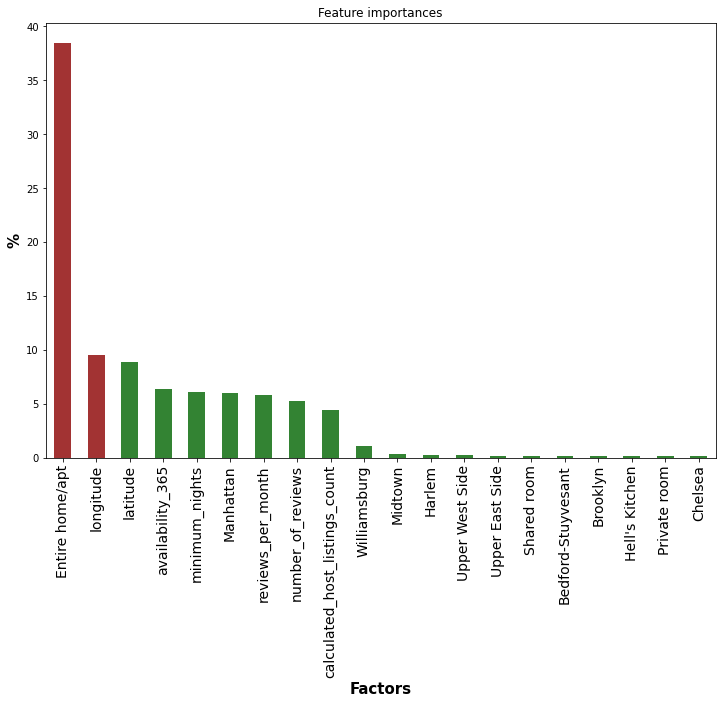

In [30]:
barplot = features.mul(100).nlargest(20)
colormat= ['darkred','darkred','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'
           ,'darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'
           ,'darkgreen','darkgreen','darkgreen','darkgreen'  ]

barplot.plot(kind='bar',title='Feature importances', color = colormat, alpha = 0.8,figsize=(12,8))
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('%', fontsize = 15, weight = 'bold')
plt.tick_params(axis='x', which='major', labelsize=14)
plt.show()

From the feature selection above, I can see Neighbourhoods doesn't contribute a lot to the model. So, I'm going to drop the column and rerun the data.

Now, let's run the correlation matrix on the data set.

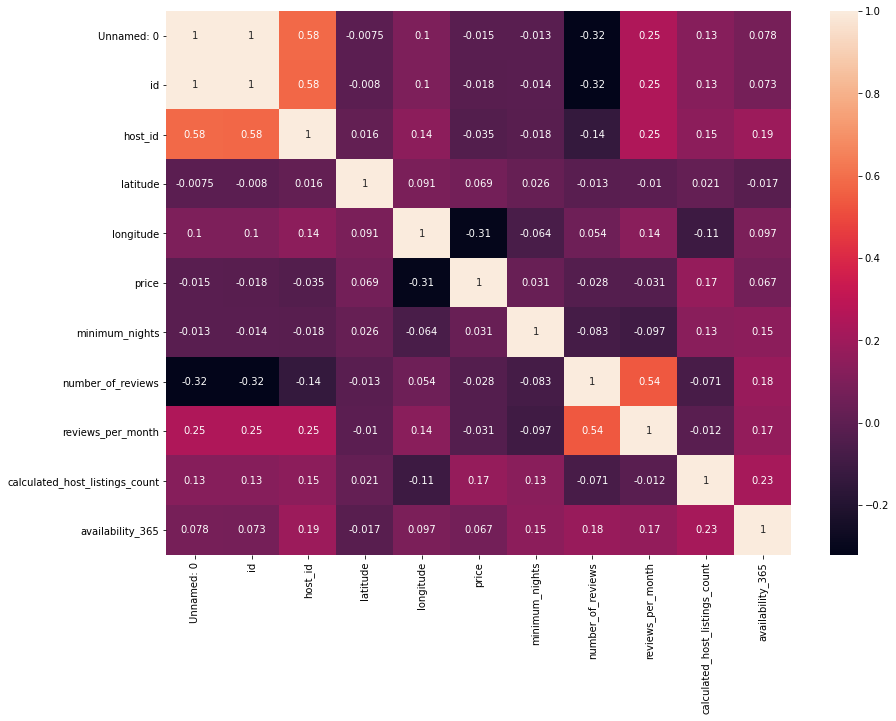

In [31]:
Corr = data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(Corr, annot = True)
plt.show()

Number_of_review and review_per_month are highly correlated, so I'm going to remove number_of_review column. 

In [38]:
new_data.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [39]:
#again drop the irrelevant columns 
new_data = new_data[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [40]:
new_feat = pd.concat([new_data,N2,R1],axis=1)
new_feat =new_feat.drop(['neighbourhood_group','neighbourhood','room_type'],axis=1)

In [41]:
new_feat.shape

(45923, 15)

In [42]:
new_feat.head(2)

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,0.21,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,0.38,2,355,0,0,1,0,0,1,0,0


In [43]:
new_feat.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt',
       'Private room', 'Shared room'],
      dtype='object')

In [44]:
chng_col = new_feat.rename(columns={'Entire home/apt':'Entire_home/apt','Private room':'Private_room','Shared room':'Shared_room','Staten Island':'Staten_Island'}, inplace=True)

In [45]:
new_feat = pd.concat([new_feat,chng_col],axis=1)

In [46]:
new_feat.head()

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Entire_home/apt,Private_room,Shared_room
0,40.64749,-73.97237,149,1,0.210000,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,0.380000,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,1.373221,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,4.640000,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,0.100000,1,0,0,0,1,0,0,1,0,0


In [47]:
X = new_feat.drop('price',axis=1)
y = new_feat.price

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [49]:
features = pd.Series(model.feature_importances_,index=X.columns)
features.nlargest(20)

Entire_home/apt                   0.384141
latitude                          0.135096
longitude                         0.131128
reviews_per_month                 0.082706
availability_365                  0.077592
minimum_nights                    0.071270
Manhattan                         0.058879
calculated_host_listings_count    0.050048
Brooklyn                          0.004163
Private_room                      0.001829
Shared_room                       0.001565
Queens                            0.000884
Bronx                             0.000423
Staten_Island                     0.000277
dtype: float64

In [50]:
# from sklearn.preprocessing import MinMaxScaler

# mms = MinMaxScaler()
# mms.fit(X)
# X_scaled = mms.transform(X)

In [51]:
# import all the libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [49]:
lin = LinearRegression()
lin.fit(X_train,y_train)

lin_pred = lin.predict(X_test)

np.mean(cross_val_score(lin,X_train,y_train,scoring='neg_mean_absolute_error'))
print('mae for Linear Regression :',mean_absolute_error(y_test,lin_pred))
print('mse for Linear Regression :',mean_squared_error(y_test, lin_pred))
print('Rmse for Linear Regression :',np.sqrt(mean_squared_error(y_test, lin_pred)))
print('r2 score for Linear Regression :', r2_score(y_test,lin_pred))

mae for Linear Regression : 36.58426258006835
mse for Linear Regression : 2433.7973887860994
Rmse for Linear Regression : 49.333532093152414
r2 score for Linear Regression : 0.47162279913798144


In [50]:
#Lasso
lm_1 = Lasso()
lm_1.fit(X_train,y_train)

#prediction
lm_1_pred = lm_1.predict(X_test)

np.mean(cross_val_score(lm_1,X_train,y_train,scoring='neg_mean_absolute_error'))
print('mae for Lasso :',mean_absolute_error(y_test,lm_1_pred))
print('mse for Lasso :',mean_squared_error(y_test, lm_1_pred))
print('Rmse for Lasso :',np.sqrt(mean_squared_error(y_test, lm_1_pred)))
print('r2 score for Lasso :', r2_score(y_test,lm_1_pred))

mae for Lasso : 37.64106052695671
mse for Lasso : 2548.052790601572
Rmse for Lasso : 50.47824076373474
r2 score for Lasso : 0.44681796136767926


In [51]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

#prediction
tree_prd = tree.predict(X_test)


np.mean(cross_val_score(tree,X_train,y_train,scoring='neg_mean_absolute_error'))

print('mae for tree :',mean_absolute_error(y_test,tree_prd))
print('mse for tree :',mean_squared_error(y_test, tree_prd))
print('Rmse for tree :',np.sqrt(mean_squared_error(y_test, tree_prd)))
print('r2 score for tree :', r2_score(y_test,tree_prd))

mae for tree : 43.19323130521339
mse for tree : 3837.6539753639418
Rmse for tree : 61.94880124234804
r2 score for tree : 0.16684565661763495


In [52]:
#KNeighbour 
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor()
Knn.fit(X_train,y_train)

#prediction
Knn_pred = Knn.predict(X_test)

np.mean(cross_val_score(Knn,X_train,y_train,scoring='neg_mean_absolute_error'))

print('mae for KNeighbour :',mean_absolute_error(y_test,Knn_pred))
print('mse for KNeighbour :',mean_squared_error(y_test, Knn_pred))
print('Rmse for KNeighbour :',np.sqrt(mean_squared_error(y_test, Knn_pred)))
print('r2 score for KNeighbour :', r2_score(y_test,Knn_pred))

mae for KNeighbour : 41.76274729376633
mse for KNeighbour : 3130.0952693791214
Rmse for KNeighbour : 55.94725435067499
r2 score for KNeighbour : 0.32045658998307813


In [54]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor()
rg.fit(X_train,y_train)

#prediction
rg_pred = rg.predict(X_test)

np.mean(cross_val_score(rg,X_train,y_train,scoring='neg_mean_absolute_error'))


print('mae for RandomForestRegressor :',mean_absolute_error(y_test,rg_pred))
print('mse for RandomForestRegressor :',mean_squared_error(y_test, rg_pred))
print('Rmse for RandomForestRegressor :',np.sqrt(mean_squared_error(y_test, rg_pred)))
print('r2 score for RandomForestRegressor :', r2_score(y_test,rg_pred))

mae for RandomForestRegressor : 32.341919085538905
mse for RandomForestRegressor : 2040.4229476844023
Rmse for RandomForestRegressor : 45.17104102945163
r2 score for RandomForestRegressor : 0.5570243559962722


Random forest is the best model so far, I'm going to using GridSearchCV to make the model better.

In [36]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ('mae','mse'),
    'max_features': ['auto','sqrt','log2'],
    'n_estimators': range(1,25,10)
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='neg_mean_absolute_error',
                          cv = 3, n_jobs = -1, verbose = 2)

In [37]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 50.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ('mae', 'mse'), 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': range(1, 25, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [38]:
grid_search.best_score_


-31.460053200528083

In [39]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
rfc1=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rfc1.fit(X_train, y_train)

rfc_pred = rfc1.predict(X_test)

np.mean(cross_val_score(rfc1,X_train,y_train,scoring='neg_mean_absolute_error'))

print('mae for New RandomForestRegressor :',mean_absolute_error(y_test,rfc_pred))
print('mse for New RandomForestRegressor :',mean_squared_error(y_test, rfc_pred))
print('Rmse for New RandomForestRegressor :',np.sqrt(mean_squared_error(y_test, rfc_pred)))
print('r2 score for New RandomForestRegressor :', r2_score(y_test,rfc_pred))

mae for New RandomForestRegressor : 31.77865434863755
mse for New RandomForestRegressor : 1980.904853595869
Rmse for New RandomForestRegressor : 44.507357297371286
r2 score for New RandomForestRegressor : 0.5699457290325161


# Save Model

In [56]:
import pickle
pickl = {'model': rfc1}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [66]:
import pickle
import gzip
pickl = {'model': rfc1}

def save_zipped_pickle(pickl, filename, protocol=-1):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(pickl, f, protocol)

In [75]:
file_name = "model_file_new.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [76]:
model.predict(np.array(list(X_test.iloc[29,:])).reshape(1,-1))[0]


99.16

In [80]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [253]:
X_test.columns

Index(['latitude', 'longitude', 'minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten_Island', 'Entire_home/apt',
       'Private_room', 'Shared_room'],
      dtype='object')

In [252]:
list(X_test.iloc[29,:])

[40.694720000000004,
 -73.89663,
 2.0,
 3.6,
 2.0,
 127.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]